<a href="https://colab.research.google.com/github/Usanzimfura/Danny-Portofolio/blob/main/FoodHub_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FoodHub Data Analysis Project



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [45]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

In [74]:
#### Installing kaleido to help display the plotly images on github
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.0 MB/s eta 0:00:00


### Understanding the structure of the data

In [ ]:
########## MOUNTING MY DRIVE ###############
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##########IMPORTING MY DATASET #####################
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/foodhub_order.csv")
# Returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### How many rows and columns are present in the data

In [ ]:
# Check the shape of the dataset
df.shape

(1898, 9)

### Let's check datatypes of the different columns in the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### Let's check if there is any missing value

In [ ]:
#######Checking for missing values in the data
print("Any missing value? ",df.isnull().values.any())
print("The sum of missing values is :",df.isnull().sum())

Any missing value?  False
The sum of missing values is : order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


### Checking for statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed

In [ ]:
###### Get the summary statistics of the numerical data
df['food_preparation_time'].describe()

,food_preparation_time
count,1898.000000
mean,27.371970
std,4.632481
min,20.000000
25%,23.000000
50%,27.000000
75%,31.000000
max,35.000000


### Let's check for How many orders are not rated?

In [ ]:
##checking how many cuisines are not rated
df.loc[df['rating'] == 'Not given','cuisine_type'].value_counts()

,count
cuisine_type,
American,216
Japanese,197
Italian,126
Chinese,82
Mexican,29
Indian,23
Middle Eastern,15
Mediterranean,14
Thai,10


## **Exploratory Data Analysis (EDA)**

### **Univariate Analysis**

In this phase of analysis we will explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

#### Order ID

In [62]:
# check unique order ID
df['order_id'].nunique()

1898

#### Customer ID

In [63]:
# check unique customer ID
df['customer_id'].nunique()

1200

#### Restaurant name

In [64]:
# check unique Restaurant Name
print("The number of restaurant is ",df['restaurant_name'].nunique() )

The number of restaurant is  178


#### Cuisine type

In [65]:
# Check unique cuisine type
print("The number of unique cuisine types is ", df['cuisine_type'].nunique())

The number of unique cuisine types is  14


<Axes: xlabel='cuisine_type', ylabel='count'>

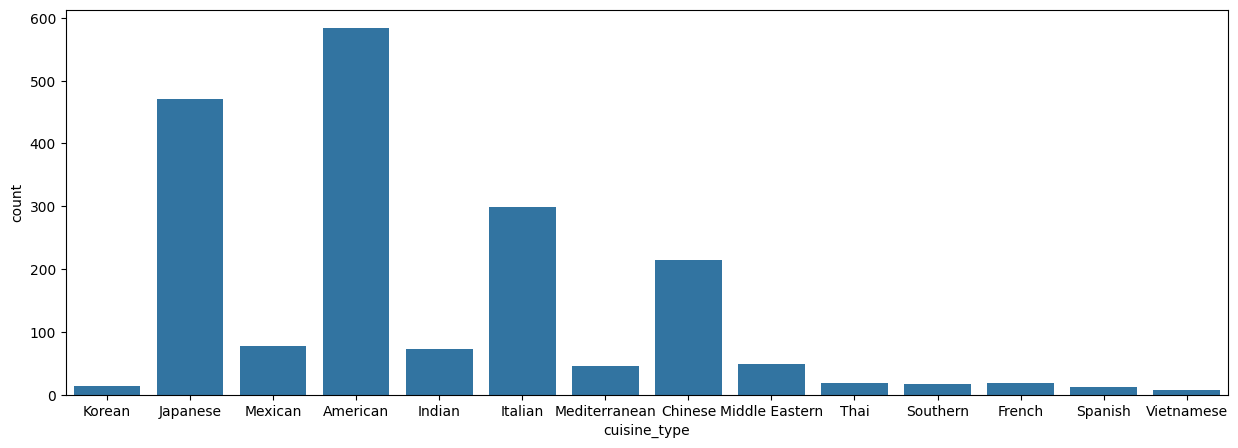

In [66]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') ## Create a countplot for cuisine type.

**Observation:** The above chart, shows that the Amarican and Japanese cuisines are the most ordered while the Vietnamese and Spanish are the least ordered cuisines

#### Cost of the order

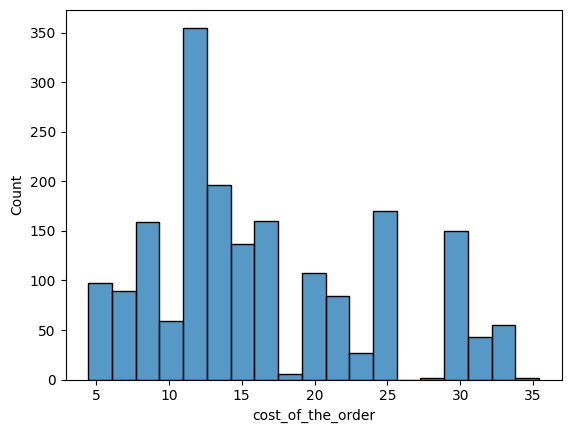

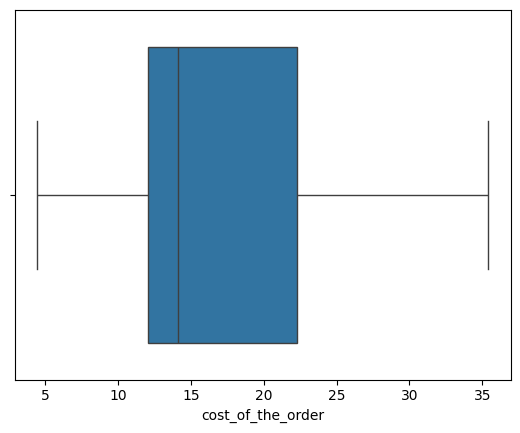

In [67]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

#### Day of the week

In [68]:
# # Check the unique values
df['day_of_the_week'].nunique() ## Complete the code to check unique values for the 'day_of_the_week' column

2

<Axes: xlabel='day_of_the_week', ylabel='count'>

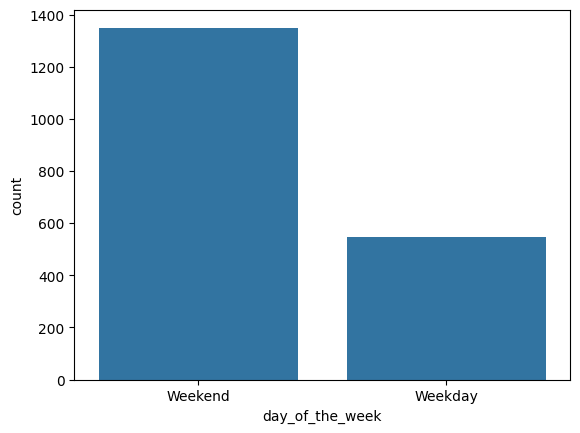

In [69]:
sns.countplot(data = df, x = 'day_of_the_week') ## Complete the code to plot a bar graph for 'day_of_the_week' column

#### Rating

In [70]:
# Check the unique values
df['rating'].nunique() ## Complete the code to check unique values for the 'rating' column

4

<Axes: xlabel='rating', ylabel='count'>

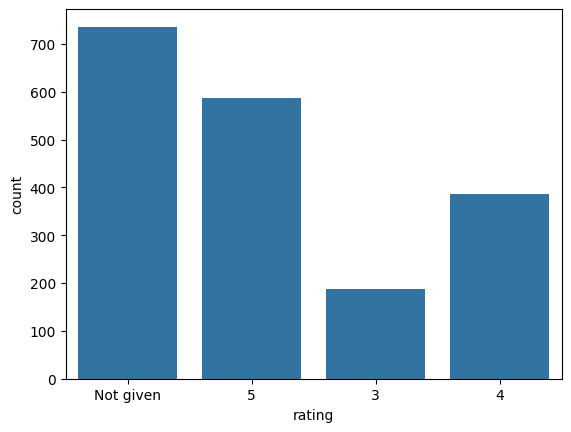

In [71]:
sns.countplot(data = df, x = 'rating') ## Complete the code to plot bar graph for 'rating' column

#### Food Preparation time

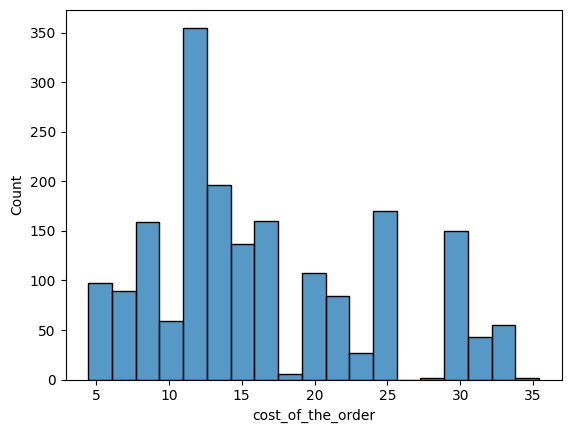

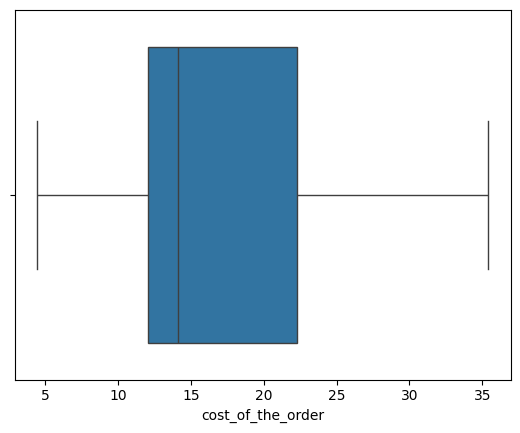

In [72]:
sns.histplot(data=df,x='cost_of_the_order') ## Complete the code to plot the histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Complete the code to plot the boxplot for the cost of order
plt.show()

#### Delivery time

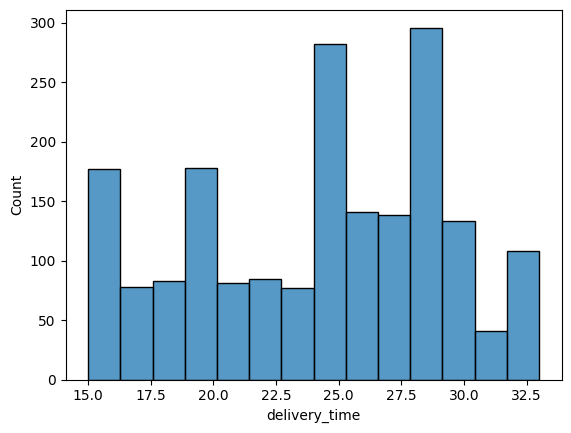

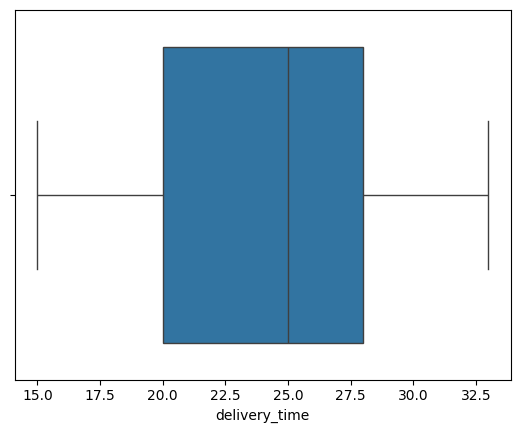

In [73]:
sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

### Top 5 restaurants in terms of the number of orders received

In [ ]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


### Let's check the most popular cuisine on weekends

In [ ]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts().head(3)

,count
cuisine_type,
American,415
Japanese,335
Italian,207


### Let's check the  percentage of the orders which cost more than 20 dollars

In [ ]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20]

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


### What is the mean order delivery time?

In [ ]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()  ## Write the appropriate function to obtain the mean delivery time

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


### The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# Get the counts of  each customer_id
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


### Multivariate Analysis

In this phase of the analysis, we will explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

#### Cuisine vs Cost of the order

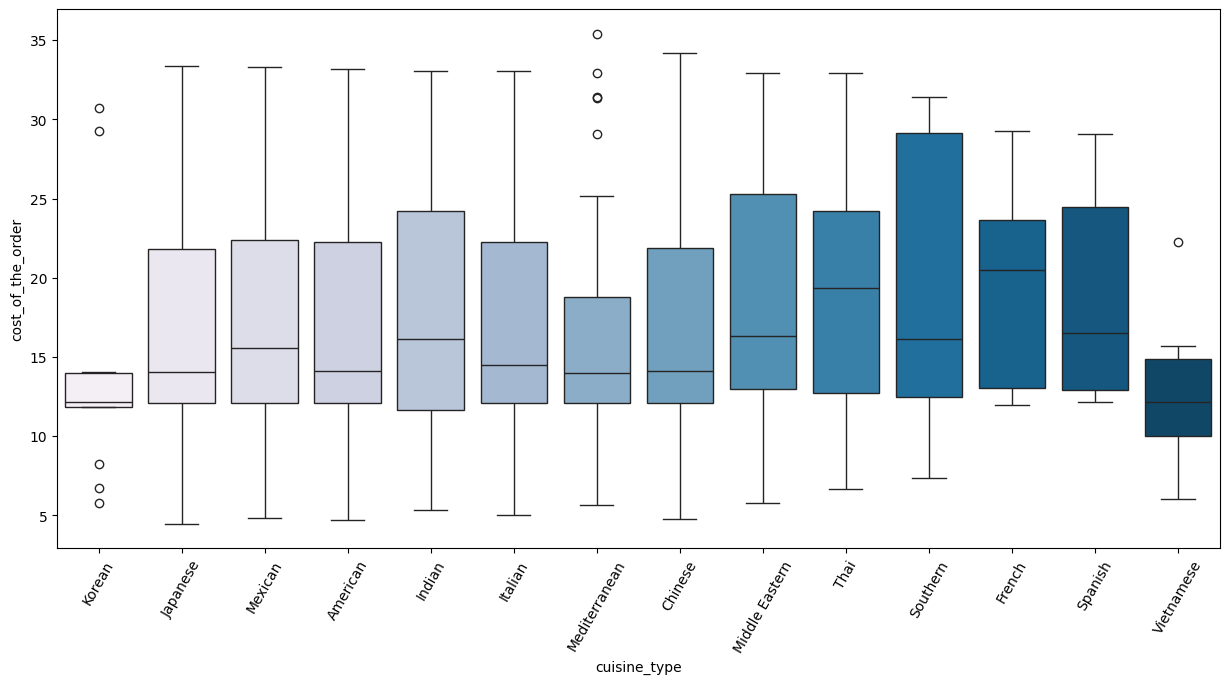

In [46]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

**Observation:** Based on the above chart, the French and Thai Cuisine are have the highest average cost of order than others.

#### Cuisine vs Food Preparation time

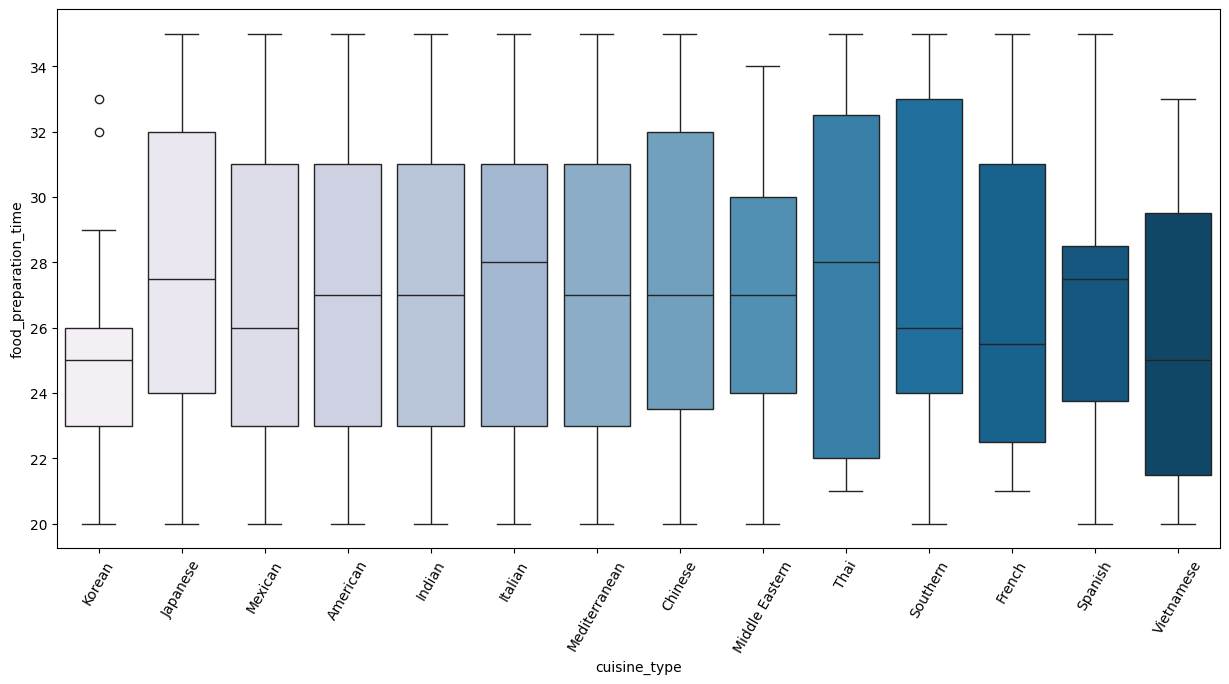

In [47]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x=  'cuisine_type',y='food_preparation_time',palette='PuBu')
plt.xticks(rotation = 60)
plt.show()

**Observation:** The Thai and Italian  cuisine have the highest average preparation time compared to other while the Korean and French cuisine have the lowest food prepartion time.

#### Day of the Week vs Delivery time

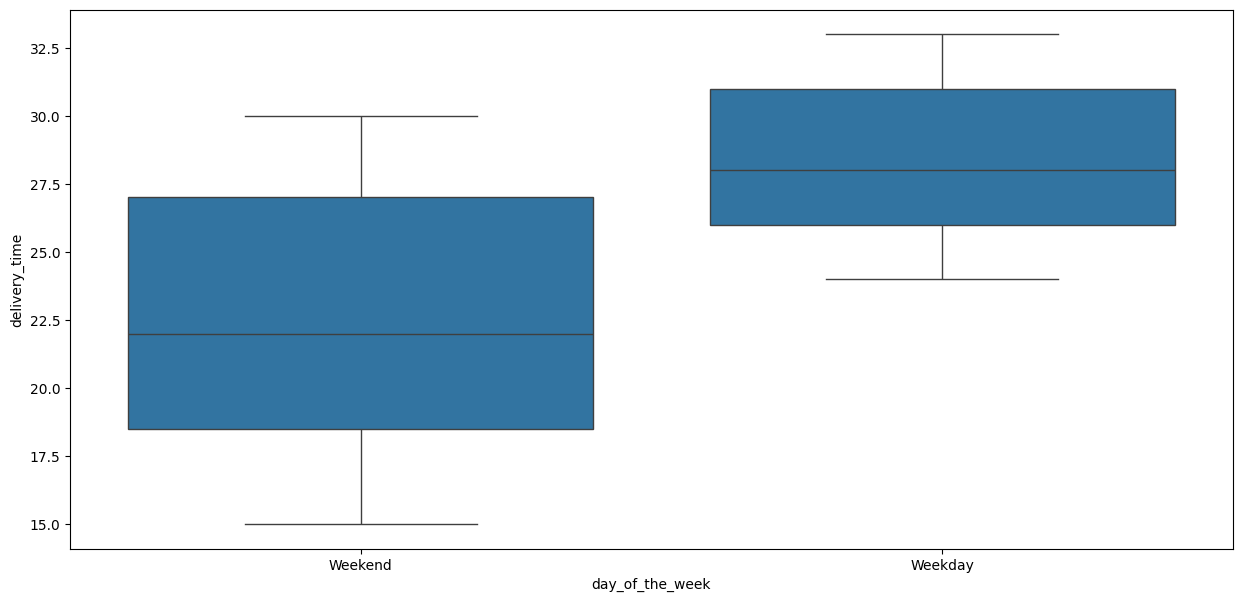

In [48]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time')
plt.show()

**Observation**: The delivery time in the Weekdays is higher in comparison
with the Weekends

**Let's check if the delivery time in the Weekend is the same with the Weekdays**

In [ ]:
# Checking if the delivery in the weekend is the same same with the weekdays
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['delivery_time'].describe()## describe the delivery time in weekends
print("The average time for food delivery in the Weekend is ",round(df_weekend['delivery_time'].mean()),"minutes which can go ",round(df_weekend['delivery_time'].std()),"minutes higher or lower")

The average time for food delivery in the Weekend is  22 minutes which can go  5 minutes higher or lower


In [ ]:
# Checking if the delivery in the weekend is the same same with the weekdays
df_weekday = df[df['day_of_the_week'] == 'Weekday']
df_weekday['delivery_time'].describe()## describe the delivery time in weekends
print("In the Weekdays, average time for food delivery is", round(df_weekday['delivery_time'].mean())," minutes which sometimes can go ",round(df_weekday['delivery_time'].std()),"minutes higher or lower")

In the Weekdays, average time for food delivery is 28  minutes which sometimes can go  3 minutes higher or lower


In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Let's check  the total revenue generated by the restaurants

In [ ]:
##### Displaying the top 14 restaurants based their Total generated Revenue #######
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

,cost_of_the_order
restaurant_name,
Shake Shack,3579.53
The Meatball Shop,2145.21
Blue Ribbon Sushi,1903.95
Blue Ribbon Fried Chicken,1662.29
Parm,1112.76
RedFarm Broadway,965.13
RedFarm Hudson,921.21
TAO,834.50
Han Dynasty,755.29


#### Rating vs Delivery time

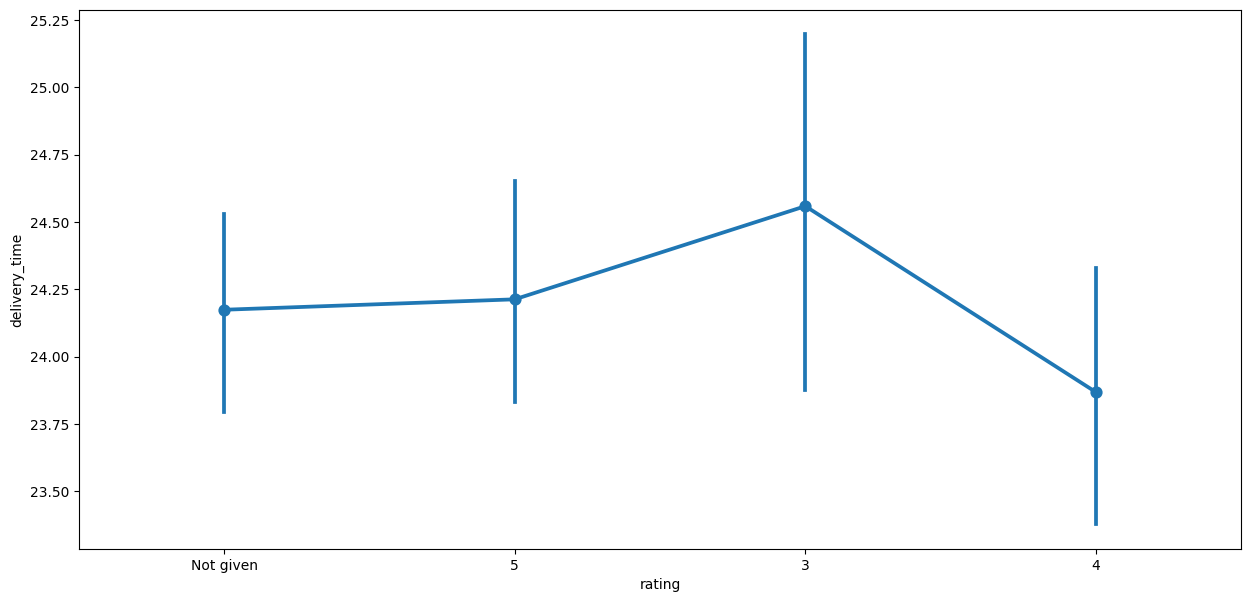

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

**Observation:** Those rated by 3 have the highest delivery time while those who have 4 star rating have the lowest delivery time

#### Rating vs Food preparation time

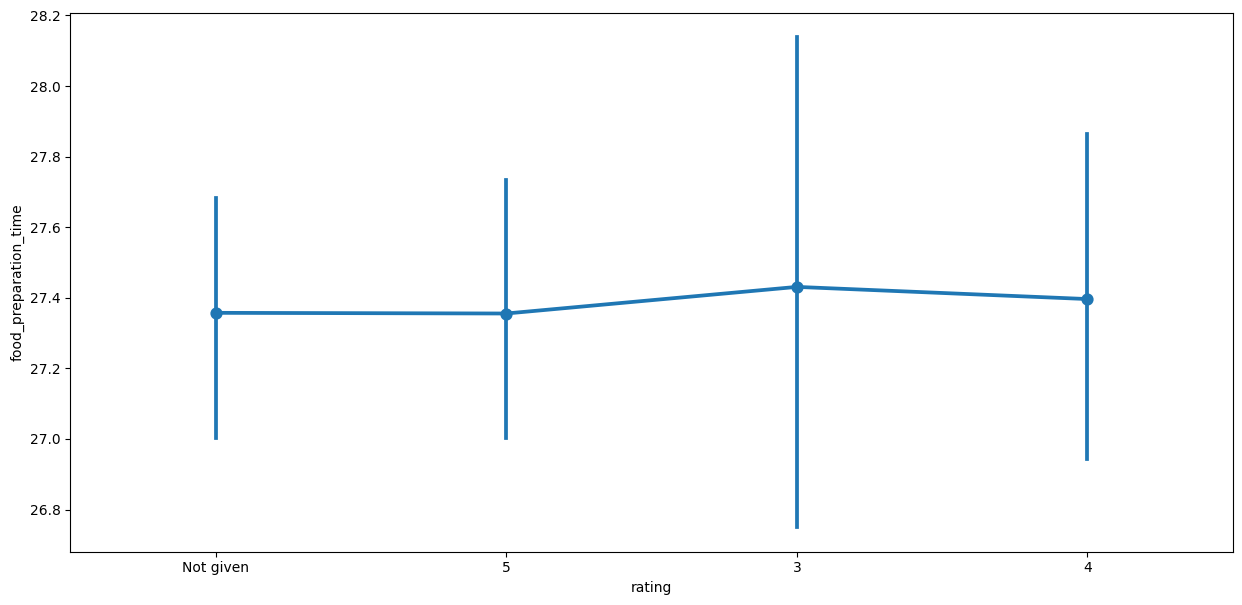

In [49]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(data=df,y='food_preparation_time',x='rating')  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

**Observation:** Those that have 5 star rating have less food preparation time while those with 3 ratings have higher preparation time

#### Rating vs Cost of the order

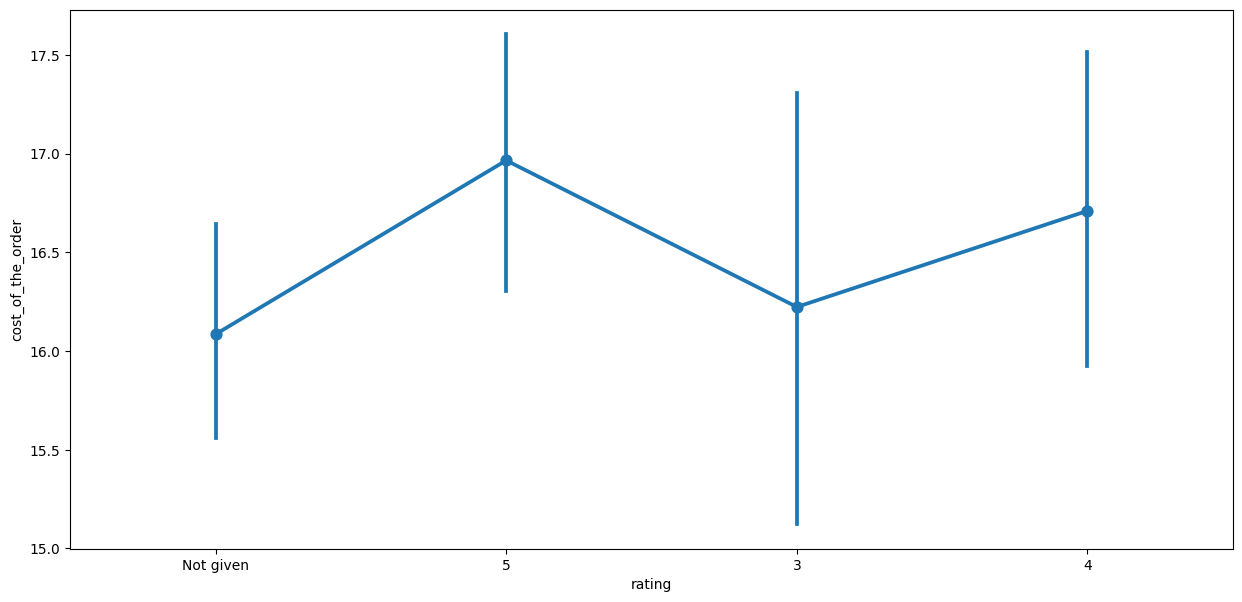

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(data=df,x='rating',y='cost_of_the_order')   ## Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.show()

**Observation:** The cost of order for those with 5 star rating is higher compared with others

#### Correlation among variables

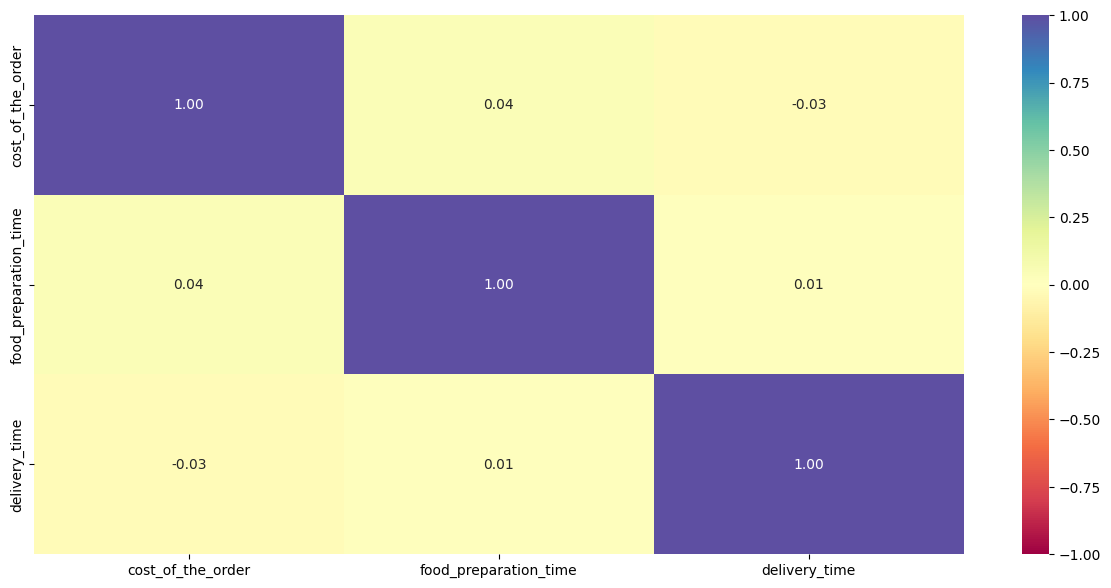

In [ ]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observation:**  
* Based on the heatmap above, there is a 0.04 correlation between the cost of the order and food preparation time.
* There is a 0.01 correlation between Food preparation time and the Delivery time.

###  The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Let's find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name'] ##

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()


,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. So, Let's find the net revenue generated by the company across all orders

In [ ]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
# get the total revenue and print it
total_rev = df['Revenue'].sum()
print('The net revenue is around', round(total_rev, 2),'dollars')

The net revenue is around 6166.3 dollars


In [ ]:
# get the total revenue in weekend
total_rev = df[df['day_of_the_week']=='Weekend']['Revenue'].sum() ## Write the appropriate function to get the total revenue in the weekends
print('In the Weekends, the net revenue is around', round(total_rev, 2), 'dollars')

In the Weekends, the net revenue is around 4411.97 dollars


In [ ]:
# get the weekday total revenue
total_rev = df[df['day_of_the_week']=='Weekday']['Revenue'].sum() ## Write the appropriate function to get the total revenue in the weekdays
print('In the Weekdays, the net revenue is around', round(total_rev, 2), 'dollars')

In the Weekdays, the net revenue is around 1754.33 dollars


### The company wants to analyze the total time required to deliver the food. So, let's find what percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']


## Write the code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)

greater_60=df[df['total_time']>60]
perc_order=((greater_60['total_time'].count())*100)/(df['total_time'].count())
print("Percentage of orders that have more than 60 minutes of total delivery time is:",round(perc_order,2),"%")



Percentage of orders that have more than 60 minutes of total delivery time is: 10.54 %










### The company wants to analyze the delivery time of the orders on weekdays and weekends. Let's check how does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## Write the code below to get the mean delivery time on weekends and print it


print("The mean delivery time on the Weekends is around:",round(df[df['day_of_the_week']=='Weekend']['delivery_time'].mean()),"minutes")



The mean delivery time on weekdays is around 28 minutes
The mean delivery time on the Weekends is around: 22 minutes


### **Conclusion and Recommendations**

### Conclusions:
After analyzing our data, the following findings have been found:
* American Cuisine is the most popular cuisine
* Shake shack restaurant has the highest number of orders which is 219 orders
* The number of total orders that cost above 20 dollars is: 555 and the Percentage of orders above 20 dollars: 29.24 %
* The mean delivery time for this dataset is 24.16 minutes
* The average time for food delivery is  22 minutes which sometimes can go  5 minutes higher or lower
* In the Weekdays, average time for food delivery is 28  minutes which sometimes can go  3 minutes higher or lower
* The lowest average cost of orders is for Vietnamese cuisine while the highest one is for French cuisine
* The analysis shows that the higher delivery time, the lower is the rating
* Same on the food preparation time, the higher the preparation time the lower the rating for example orders which were rated 3, are orders which took much time.
* In the Weekends, the net revenue is around 4411.97 dollars while In the Weekdays, the net revenue is around 1754.33 dollars


### Recommendations:
To enhance the customer experience and help improve the business, the company Manager will need to take the following measures:
*  Keep an eye on cuisines which are most popular and keep improving them.
* Reduce the food preparation time and delivery time for as per the rating, the more the food take time to be prepared and delivery, the more customer experience get worse.
* Take measures to improve the customer experience in the weekdays by improving the time it takes for a customer to have the order.
* Provide promotions on orders made in weekdays. This will not only improve the customer exprience but it will also increase total revenue made by the company for more customers will come in the weekdays. As per our analysis, many orders are made in the weekends and the total revenue made in the weekends is significanly higher than revenue made in the weekdays.

---